### Importing our Libraries

In [107]:
import pandas as pd
import numpy as np

from sklearn import metrics 
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
#setting our columns to display full values
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:20,.2f}'.format)

### Installing important libraries

In [ ]:
#i had to install this to work on this excel file 
!pip install xlrd

### Reading our Dataset and Column Descriptions to our notebook


In [219]:
#importing the data
df = pd.read_excel("Week2_challenge_data_source.xlsx")


Creating a copy

In [220]:
#importing the data description
df_descript = pd.read_csv("Field Descriptions - Sheet1.csv")

Removing all columns with space and lowering the  letters of the columns

In [221]:
df.columns = [label.replace(' ', '_').lower() for label in df.columns]

### Exploring our Datasets

I want to try to understand the data here and check for missing values 

We start with understanding what different columns stand for, here is a view of the different columns meaning this helps others understand this data too 

In [222]:
df_descript

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


This shows us the different data types and number of non-null values in each columns

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   dur._(ms)                                 150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn/number                             148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

This shows us the Numbers of Rows and Columns in our dataset 

In [224]:
df.shape 

(150001, 55)

The numbers of unique values in each columns are shown below to understand a little bit, how the data is distributed 

In [225]:
df.nunique().sort_values(ascending=False)

total_dl_(bytes)                            149987
other_dl_(bytes)                            149986
gaming_dl_(bytes)                           149983
total_ul_(bytes)                            149728
youtube_dl_(bytes)                          149547
netflix_dl_(bytes)                          149518
netflix_ul_(bytes)                          149490
youtube_ul_(bytes)                          149477
gaming_ul_(bytes)                           149316
other_ul_(bytes)                            149284
google_dl_(bytes)                           149024
google_ul_(bytes)                           147267
email_dl_(bytes)                            146916
social_media_dl_(bytes)                     146856
email_ul_(bytes)                            138699
bearer_id                                   134709
dur._(ms).1                                 122871
start                                       111881
imei                                        107270
imsi                           

### Analysis of Null Values in our dataset

I want to analyze my dataset to understand where the null values are and how to deal with them 

In [226]:
#i am trying to understanding the null values here by analyzing the percentage of missing values in each columns
null = df.isna().sum().sort_values(ascending = False)
null_per = (null/150001) * 100
null_perc = pd.DataFrame(null_per)
null_perc.head(30)

,0
nb_of_sec_with_37500b_<_vol_ul,86.835421
nb_of_sec_with_6250b_<_vol_ul_<_37500b,74.561503
nb_of_sec_with_125000b_<_vol_dl,65.024900
tcp_ul_retrans._vol_(bytes),64.432237
nb_of_sec_with_31250b_<_vol_dl_<_125000b,62.390251
nb_of_sec_with_1250b_<_vol_ul_<_6250b,61.928920
nb_of_sec_with_6250b_<_vol_dl_<_31250b,58.877607
tcp_dl_retrans._vol_(bytes),58.763608
http_ul_(bytes),54.539636
http_dl_(bytes),54.315638


I have noticed the columns with a lot of missing values and would decide now how to impute this, i would be mean as already stated for numerical columns and median to replace null for Categorical columns 

I would start with getting all the missing numerical values in our missing data, i would turn all the values in null percent to a list of columns  

In [227]:
null_perc.reset_index(inplace=True)
missing = list(null_perc['index'])

We would append numerical values that are missing to one list and the categorical columns to another list

In [228]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numcols =[]
catcols = []
for data in missing:
    if df[data].dtypes in numerics:
        numcols.append(data)
    else:
        catcols.append(data)    

There are some values that are numerical but are not supposed to be like the IMEI, IMSI,MSISDN we would remove them from our list of numerical values

we would create a new list for the categorical values remove them from the numerical list and add to the categorical columns

In [229]:
catcoladd =['imei', 'imsi','msisdn/number']
for c in catcoladd:
    numcols.remove(c)

In [230]:
catcols.extend(catcoladd)

We would start with filling the missing values in the numerical column with the mean of the column

In [231]:
for col in numcols:
    df[col] = df[col].fillna(df[col].mean())

Confirm if what we did work

In [232]:
df[numcols].isnull().any()

nb_of_sec_with_37500b_<_vol_ul              False
nb_of_sec_with_6250b_<_vol_ul_<_37500b      False
nb_of_sec_with_125000b_<_vol_dl             False
tcp_ul_retrans._vol_(bytes)                 False
nb_of_sec_with_31250b_<_vol_dl_<_125000b    False
nb_of_sec_with_1250b_<_vol_ul_<_6250b       False
nb_of_sec_with_6250b_<_vol_dl_<_31250b      False
tcp_dl_retrans._vol_(bytes)                 False
http_ul_(bytes)                             False
http_dl_(bytes)                             False
avg_rtt_dl_(ms)                             False
avg_rtt_ul_(ms)                             False
nb_of_sec_with_vol_ul_<_1250b               False
10_kbps_<_ul_tp_<_50_kbps_(%)               False
ul_tp_<_10_kbps_(%)                         False
ul_tp_>_300_kbps_(%)                        False
50_kbps_<_ul_tp_<_300_kbps_(%)              False
nb_of_sec_with_vol_dl_<_6250b               False
50_kbps_<_dl_tp_<_250_kbps_(%)              False
dl_tp_<_50_kbps_(%)                         False


Next we would try to fill the categorical variables by the mode since we cannot use mean here

we would have to convert all the new columns we added to object data type

In [233]:
df[catcoladd] = df[catcoladd].astype('str')

In [234]:
df[catcoladd].dtypes

imei             object
imsi             object
msisdn/number    object
dtype: object

In [235]:
for col in catcols:
    df[col] = df[col].fillna(df[col].mode()[0])

we would check all our categorical column to see if what we did worked 

In [236]:
df[catcols].isnull().any()

last_location_name      False
handset_type            False
handset_manufacturer    False
end                     False
start                   False
bearer_id               False
imei                    False
imsi                    False
msisdn/number           False
dtype: bool

### User Overview Analysis

#### Identifying the top 10 handsets used by the customers.

In [237]:
top_ten = df['handset_type'].value_counts(ascending = False).head(10).reset_index().copy()
top_ten = top_ten.rename(columns={'index':"Handset Type","handset_type":"Count"})
top_ten

,Handset Type,Count
0,Huawei B528S-23A,20324
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


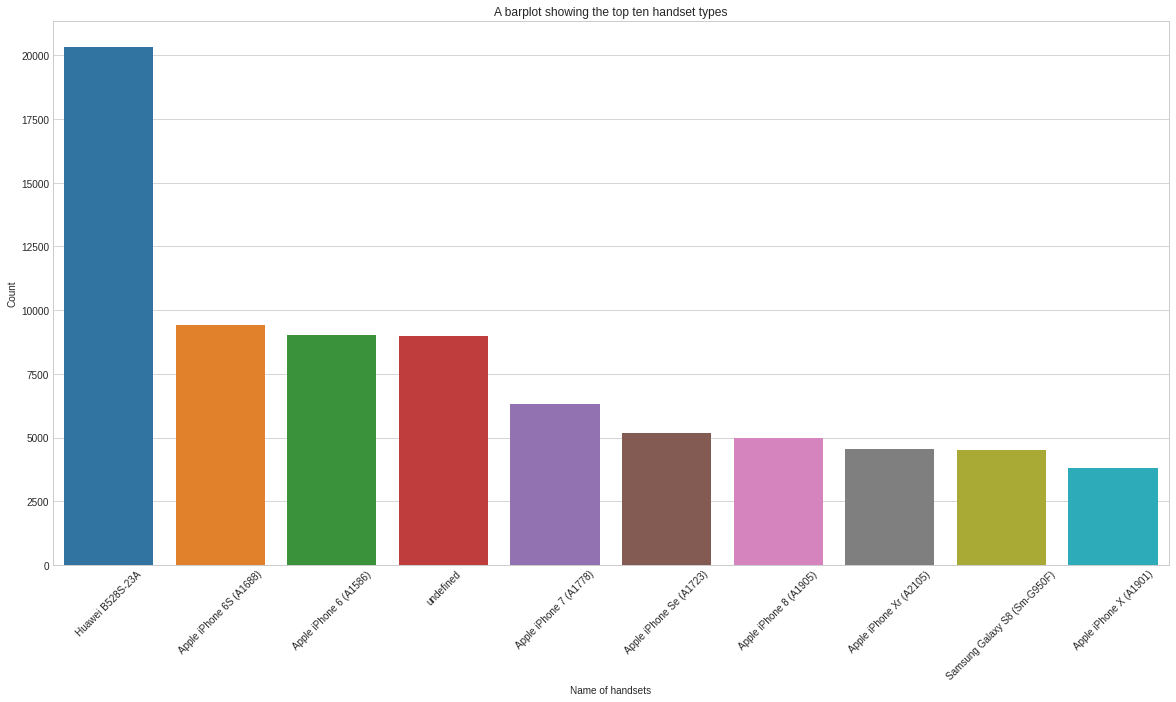

In [238]:
plt.figure(figsize=(20,10))
sns.barplot(x = top_ten['Handset Type'], y = top_ten['Count'])
plt.xlabel('Name of handsets')
plt.xticks(rotation=45)
plt.title('A barplot showing the top ten handset types');

#### Top 3 Handset Manufacturer

In [239]:
top_three = df['handset_manufacturer'].value_counts(ascending = False).head(3).reset_index().copy()
top_three = top_three.rename(columns={'index':"Handset Manufacturer","handset_manufacturer":"Count"})
top_three

,Handset Manufacturer,Count
0,Apple,60137
1,Samsung,40839
2,Huawei,34423


#### Top 5 handset per Handset Manufacturer

In [36]:
top_fivemanf = df.groupby(['handset_manufacturer','handset_type'])['handset_type'
                                                                  ].count().reset_index(name="count").copy()

In [35]:
top_fivemanf=top_fivemanf.sort_values(['handset_manufacturer','count'], ascending=False).groupby('handset_manufacturer').head(5)
top_fivemanf.head(10)

,handset_manufacturer,handset_type,count
1396,undefined,undefined,8987
1394,Zyxel Communications Corp,Zyxel Communicat. Lte7460,1
1395,Zyxel Communications Corp,Zyxel Communicat. Sbg3600,1
1393,ZyXEL Communications Corp,Zyxel Communicat. Zyxel Wah7706,1
1388,Zte,Zte Mf259,170
1390,Zte,Zte Racer Iii Mini Zte Switch X1 Bouygues Tele...,5
1384,Zte,Zte Blade V7 Lite Blade V6 Plus Zte Blitz,3
1392,Zte,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,2
1378,Zte,Zte Axon 6S Zte Axon 7 Axon 7,1
1377,Zebra Technologies Corp.,Zebra Technologi. Symbol Tc55Bh,8


####  Make a short interpretation to the marketing team 


     Top ten handset

    From the list of top ten Handset we can observe that the most purchase unique Handset is *Huawei B528S-23A* is our most used handset while Apple IPhone is the most purchased in our Top ten Handset, Samsung also appear in the list as one of the top ten phone
    

     Recommendations
        we should try to make our service tailored for this brands.

#### Overview of Users Behavior


Bearer ID according to our data description is unique for each session, the bearer ID is our unique session identifier so to identify each session we would the bearer ID here to group them, and count them to know the total number of Unique sessions

In this analysis we would be using MSISDN as a unique identifier for each users

####  number of xDR sessions

I tried to check the kind of values in the bearer_id column

In [29]:
df['bearer_id'].value_counts().head()

                        991
13042425979269199872     16
13042425965944199168     10
13042425972278300672      9
13042425978774599680      9
Name: bearer_id, dtype: int64

    The first value with that appears 991 appears to be missing,
    I dropped all rows without Bearer ID, since we
    cannot confirm if they had more than one session or not

the total number of unique Session in our dataset is the number of unique Bearer ID

In [37]:
bearer_id =df[['msisdn/number','bearer_id']].copy()


In [38]:
NumberOfSessions=bearer_id.groupby('msisdn/number').agg({'bearer_id': 'count'})
NumberOfSessions=NumberOfSessions.rename(columns= {'bearer_id': 'xDR sessions'})

In [39]:
NumberOfSessions.head()

,xDR sessions
msisdn/number,
3197020876596.0,1
33601001722.0,1
33601001754.0,1
33601002511.0,1
33601007832.0,1


#### Session Duration

In [40]:
SessionDuration =df.groupby('msisdn/number').agg({'dur._(ms).1': 'sum'}).copy()
#here is the duration for first five rows in our dataset
SessionDuration=SessionDuration.rename(columns= {'dur._(ms).1': 'sessions duration(ms)'})
SessionDuration.head()

,sessions duration(ms)
msisdn/number,
3197020876596.0,877385325.0
33601001722.0,116720140.0
33601001754.0,181230963.0
33601002511.0,134969374.0
33601007832.0,49878024.0


#### The total download (DL) and upload (UL) data

In [41]:
UpDownload_user = df[['msisdn/number','total_ul_(bytes)','total_dl_(bytes)']].copy()
UpDownload_user = UpDownload_user.groupby('msisdn/number').sum()

In [42]:
UpDownload_user['total data'] = UpDownload_user['total_dl_(bytes)'] + UpDownload_user['total_ul_(bytes)']

In [43]:
UpDownload_user.head()

,total_ul_(bytes),total_dl_(bytes),total data
msisdn/number,,,
3197020876596.0,37295915.0,194828056.0,232123971.0
33601001722.0,36053108.0,842637466.0,878690574.0
33601001754.0,36104459.0,120755184.0,156859643.0
33601002511.0,39306820.0,556659663.0,595966483.0
33601007832.0,20327526.0,401993172.0,422320698.0


### The total data volume (in Bytes) for each application
#### Features Creation 

In [242]:
df["social_media"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
df["google"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
df['email'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
df['youtube'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
df['netflix'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
df["gaming"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
df['other']=df["other_dl_(bytes)"]+df["other_ul_(bytes)"]
df['total data'] = df['total_dl_(bytes)'] + df['total_ul_(bytes)']

In [307]:
df.to_csv("Cleaned.csv")

In [342]:
applicationDownUp =df[['msisdn/number','social_media', 'google','email', 'youtube','netflix', 'gaming','other']].copy()

In [343]:
sumforapp =applicationDownUp.groupby('msisdn/number').sum()
sumforapp.head()

,social_media,google,email,youtube,netflix,gaming,other
msisdn/number,,,,,,,
3197020876596.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,470526473.0
33601001722.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,812458661.0,386570872.0
33601001754.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,119750078.0,281710071.0
33601002511.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,538827713.0,501693672.0
33601007832.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,391126127.0,35279702.0


#### Non-Graphical Univariate Analysis

The columns we would be doing this Univariate Analysis on has been given to us earlier 

number of xDR sessions   
Session duration   
the total download (DL) and upload (UL) data   
the total data volume for Applications    

In [46]:
AnalysisOfCols=   df[['bearer_id', 'dur._(ms).1', 'total_ul_(bytes)','total_dl_(bytes)', 
                      'social_media', 'netflix', 'gaming', 'youtube', 'google', 'email', 'other']].copy()

In [49]:
AnalysisOfCols.head()

,bearer_id,dur._(ms).1,total_ul_(bytes),total_dl_(bytes),social_media,netflix,gaming,youtube,google,email,other
0,13114483460844900352,"1,823,652,892.00","36,749,741.00","308,879,636.00","1,570,185.00","17,855,187.00","292,426,453.00","18,355,943.00","2,905,912.00","3,701,304.00","180,558,843.00"
1,13114483482878900224,"1,365,104,371.00","53,800,391.00","653,384,965.00","1,933,278.00","35,565,545.00","609,920,783.00","39,359,124.00","4,414,096.00","937,385.00","541,959,383.00"
2,13114483484080500736,"1,361,762,651.00","27,883,638.00","279,807,335.00","1,726,277.00","23,751,202.00","229,980,251.00","34,425,237.00","10,229,119.00","3,363,124.00","414,908,351.00"
3,13114483485442799616,"1,321,509,685.00","43,324,218.00","846,028,530.00","657,493.00","15,092,588.00","810,387,875.00","36,534,765.00","11,811,761.00","2,070,983.00","761,837,216.00"
4,13114483499480700928,"1,089,009,389.00","38,542,814.00","569,138,589.00","912,788.00","17,539,799.00","531,237,049.00","34,222,253.00","7,748,843.00","2,110,349.00","564,619,822.00"


Measure of Central Tendency(Mean, Median, Standard Deviation and Different Quartiles) for each of the Columns

In [50]:
AnalysisOfCols.describe()

,dur._(ms).1,total_ul_(bytes),total_dl_(bytes),social_media,netflix,gaming,youtube,google,email,other
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,"104,609,105.55","41,121,206.29","454,643,430.08","1,828,250.21","22,628,606.54","430,333,100.71","22,643,482.64","7,807,294.55","2,259,102.31","429,365,343.62"
std,"81,037,341.45","11,276,348.93","244,142,060.57","1,035,646.14","9,260,820.09","244,019,924.02","9,246,800.31","3,516,420.24","1,071,109.06","243,268,073.29"
min,"7,142,988.00","2,866,892.00","7,114,041.00","1,563.00","98,432.00","306,358.00","78,903.00","40,330.00","8,359.00","149,045.00"
25%,"57,442,058.00","33,222,029.00","243,107,173.00","932,218.00","15,979,455.00","218,727,939.00","15,998,463.00","4,943,599.00","1,359,344.00","218,553,417.00"
50%,"86,399,983.00","41,143,242.00","455,840,911.00","1,826,471.00","22,635,545.00","431,614,977.00","22,661,770.00","7,812,835.00","2,263,567.00","429,986,492.00"
75%,"132,430,686.00","49,034,238.00","665,705,138.00","2,727,487.00","29,290,445.00","641,415,878.00","29,292,604.00","10,682,796.00","3,159,818.00","639,927,495.00"
max,"1,859,336,442.00","78,331,311.00","902,969,616.00","3,650,861.00","45,198,153.00","859,202,784.00","45,190,078.00","15,528,782.00","4,518,036.00","859,520,934.00"


### Outliers Detections and Understanding 

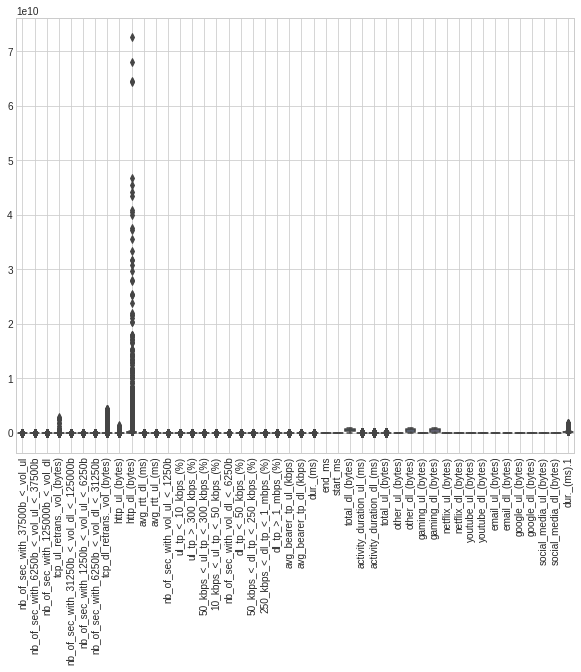

In [466]:
fig, ax = plt.subplots(figsize=(10,8))
bp =sns.boxplot(data = df[numcols])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);
plt.grid(True)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_array = scaler.fit_transform(df[numcols])

NameError: name 'numcols' is not defined

In [34]:
scaled_data = pd.DataFrame(scaled_array, columns=numcols)
scaled_data.head()

NameError: name 'scaled_array' is not defined

In [407]:
scaled_data.describe()

,nb_of_sec_with_37500b_<_vol_ul,nb_of_sec_with_6250b_<_vol_ul_<_37500b,nb_of_sec_with_125000b_<_vol_dl,tcp_ul_retrans._vol_(bytes),nb_of_sec_with_31250b_<_vol_dl_<_125000b,nb_of_sec_with_1250b_<_vol_ul_<_6250b,nb_of_sec_with_6250b_<_vol_dl_<_31250b,tcp_dl_retrans._vol_(bytes),http_ul_(bytes),http_dl_(bytes),...,gaming_dl_(bytes),netflix_ul_(bytes),netflix_dl_(bytes),youtube_dl_(bytes),email_ul_(bytes),email_dl_(bytes),google_ul_(bytes),google_dl_(bytes),social_media_ul_(bytes),social_media_dl_(bytes)
count,1.974700e+04,3.815800e+04,5.246300e+04,5.335200e+04,5.641500e+04,5.710700e+04,6.168400e+04,6.185500e+04,6.819100e+04,6.852700e+04,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,-9.715225e-18,-8.751902e-18,2.871263e-17,3.995404e-19,-1.813669e-17,9.953844e-19,-2.580273e-17,-3.101553e-18,-6.877128e-18,3.318016e-18,...,4.168490e-18,9.132782e-17,7.977565e-17,-1.226270e-16,3.808484e-17,6.191154e-17,9.663317e-18,1.231599e-17,6.442211e-17,-1.918453e-18
std,1.000025e+00,1.000013e+00,1.000010e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000008e+00,1.000008e+00,1.000007e+00,1.000007e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.216137e-01,-1.412460e-01,-3.882584e-01,-2.871748e-02,-4.396164e-01,-2.348454e-01,-4.955193e-01,-1.139863e-01,-1.656709e-01,-1.188460e-01,...,-1.729917e+00,-1.729975e+00,-1.728843e+00,-1.733692e+00,-1.731208e+00,-1.729728e+00,-1.728310e+00,-1.737805e+00,-1.732518e+00,-1.733797e+00
25%,-1.207935e-01,-1.392326e-01,-3.807971e-01,-2.854004e-02,-4.260452e-01,-2.286186e-01,-4.759958e-01,-1.137910e-01,-1.644301e-01,-1.187293e-01,...,-8.672145e-01,-8.689050e-01,-8.698179e-01,-8.643963e-01,-8.667327e-01,-8.678360e-01,-8.675113e-01,-8.668133e-01,-8.671122e-01,-8.654680e-01
50%,-1.158717e-01,-1.341990e-01,-3.383860e-01,-2.792556e-02,-3.511326e-01,-1.995599e-01,-3.480654e-01,-1.108711e-01,-1.539342e-01,-1.168299e-01,...,5.588474e-03,-8.445391e-04,2.284734e-03,-2.690318e-03,-4.161383e-03,1.714684e-03,-1.654681e-03,4.556056e-03,-4.437719e-04,-9.201286e-04
75%,-9.372389e-02,-1.110447e-01,-1.163165e-01,-2.554128e-02,-2.922538e-02,-9.508712e-02,6.501083e-02,-9.334539e-02,-8.683858e-02,-9.284601e-02,...,8.654029e-01,8.657191e-01,8.689154e-01,8.664638e-01,8.633105e-01,8.665446e-01,8.672164e-01,8.681550e-01,8.631730e-01,8.687925e-01
max,4.134567e+01,4.975523e+01,3.160663e+01,1.099115e+02,3.132986e+01,5.885870e+01,3.388229e+01,2.340873e+01,7.606588e+01,7.518387e+01,...,1.727274e+00,1.731308e+00,1.729665e+00,1.732352e+00,1.737405e+00,1.732337e+00,1.735266e+00,1.726180e+00,1.733209e+00,1.729386e+00


All values are expressed as Z-score to help us identify our outliers easily

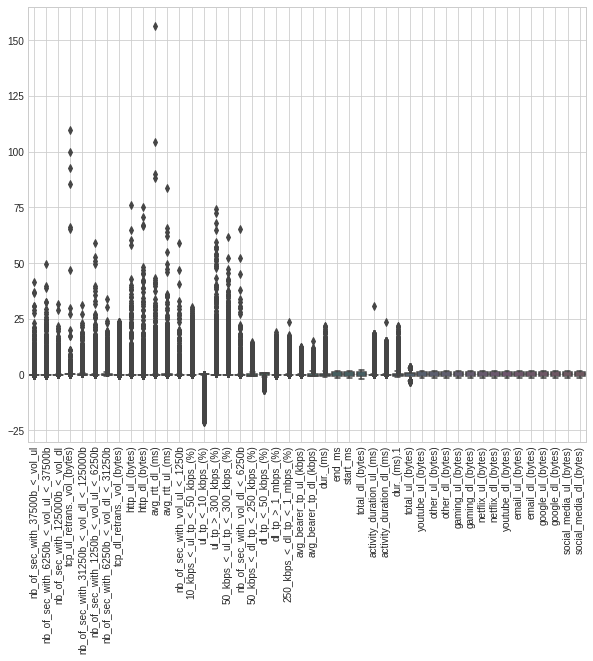

In [409]:
fig, ax = plt.subplots(figsize=(10,8))
bp =sns.boxplot(data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.grid(True)

From the figure above there are no serious outliers in the columns in question, so we would go ahead with this analysis

In [112]:
df.head()

,nb_of_sec_with_37500b_<_vol_ul,nb_of_sec_with_6250b_<_vol_ul_<_37500b,nb_of_sec_with_125000b_<_vol_dl,tcp_ul_retrans._vol_(bytes),nb_of_sec_with_31250b_<_vol_dl_<_125000b,nb_of_sec_with_1250b_<_vol_ul_<_6250b,nb_of_sec_with_6250b_<_vol_dl_<_31250b,tcp_dl_retrans._vol_(bytes),http_ul_(bytes),http_dl_(bytes),avg_rtt_dl_(ms),avg_rtt_ul_(ms),nb_of_sec_with_vol_ul_<_1250b,10_kbps_<_ul_tp_<_50_kbps_(%),ul_tp_<_10_kbps_(%),ul_tp_>_300_kbps_(%),50_kbps_<_ul_tp_<_300_kbps_(%),nb_of_sec_with_vol_dl_<_6250b,50_kbps_<_dl_tp_<_250_kbps_(%),dl_tp_<_50_kbps_(%),dl_tp_>_1_mbps_(%),250_kbps_<_dl_tp_<_1_mbps_(%),avg_bearer_tp_ul_(kbps),avg_bearer_tp_dl_(kbps),dur._(ms),end_ms,start_ms,total_dl_(bytes),activity_duration_ul_(ms),activity_duration_dl_(ms),dur._(ms).1,total_ul_(bytes),youtube_ul_(bytes),other_ul_(bytes),other_dl_(bytes),gaming_ul_(bytes),gaming_dl_(bytes),netflix_ul_(bytes),netflix_dl_(bytes),youtube_dl_(bytes),email_ul_(bytes),email_dl_(bytes),google_ul_(bytes),google_dl_(bytes),social_media_ul_(bytes),social_media_dl_(bytes)
92,149.26,141.30,989.70,"759,658.66",810.84,340.43,965.46,"20,809,914.27","3,242,301.38","114,471,023.70",109.80,17.66,222.00,0.00,100.00,0.00,0.00,134.00,0.00,100.00,0.00,0.00,41.00,28.00,"243,504.00",829.00,467.00,"556,406,594.00","48,628.00","28,253.00","243,504,362.00","43,336,429.00","14,644,405.00","3,820,483.00","318,297,673.00","2,710,989.00","519,620,584.00","20,806,551.00","7,682,779.00","17,400,892.00","882,020.00","2,653,190.00","433,758.00","6,639,041.00","38,223.00","2,410,108.00"
93,149.26,141.30,989.70,"759,658.66",810.84,340.43,965.46,"20,809,914.27","3,242,301.38","114,471,023.70",46.00,7.00,99.00,0.00,100.00,0.00,0.00,95.00,0.00,100.00,0.00,0.00,46.00,46.00,"236,570.00",444.00,641.00,"757,526,492.00","23,902.00","20,168.00","236,570,803.00","40,719,212.00","16,964,908.00","1,716,480.00","290,582,586.00","10,250,922.00","715,350,506.00","9,907,089.00","11,758,420.00","19,431,593.00","392,491.00","3,507,108.00","1,476,690.00","4,259,111.00","10,632.00","3,219,754.00"
95,149.26,141.30,989.70,"759,658.66",810.84,340.43,965.46,"20,809,914.27","3,242,301.38","114,471,023.70",109.80,17.66,194.00,0.00,100.00,0.00,0.00,155.00,0.00,100.00,0.00,0.00,51.00,23.00,"231,780.00",199.00,804.00,"139,043,208.00","38,457.00","31,466.00","231,780,395.00","53,052,136.00","13,154,981.00","14,932,623.00","350,039,548.00","14,967,821.00","124,180,544.00","9,887,128.00","753,238.00","7,438,887.00","64,850.00","3,144,169.00","38,013.00","962,332.00","6,720.00","2,564,038.00"
96,149.26,141.30,989.70,"759,658.66",810.84,340.43,965.46,"20,809,914.27","3,242,301.38","114,471,023.70",39.00,2.00,198.00,0.00,100.00,0.00,0.00,9.00,0.00,100.00,0.00,0.00,46.00,22.00,"230,839.00",176.00,676.00,"329,159,454.00","74,845.00","2,335.00","230,839,500.00","30,713,366.00","14,454,366.00","11,684,759.00","495,376,623.00","1,362,536.00","293,492,651.00","1,530,332.00","17,917,894.00","3,334,865.00","156,347.00","3,380,596.00","1,481,177.00","8,477,509.00","43,849.00","2,555,939.00"
97,149.26,141.30,989.70,"759,658.66",810.84,340.43,965.46,"20,809,914.27","3,242,301.38","114,471,023.70",38.00,1.00,372.00,0.00,100.00,0.00,0.00,354.00,0.00,100.00,0.00,0.00,47.00,49.00,"238,915.00",294.00,810.00,"546,747,900.00","98,771.00","90,256.00","238,915,484.00","57,680,454.00","21,457,678.00","9,207,067.00","624,397,048.00","8,432,981.00","516,508,263.00","13,958,301.00","1,114,842.00","23,039,020.00","591,277.00","1,907,310.00","4,000,586.00","721,187.00","32,564.00","3,457,278.00"


### Graphical Univariate Analysis

Here i would be visualizing some of the important Columns using a Dist Plot, Histogram and Box Plot, 
This would help us understand how our data is distributed.

I would be plotting this for all the important data

number of xDR sessions   
Session duration   
the total download (DL) and upload (UL) data   
the total data volume for Applications    



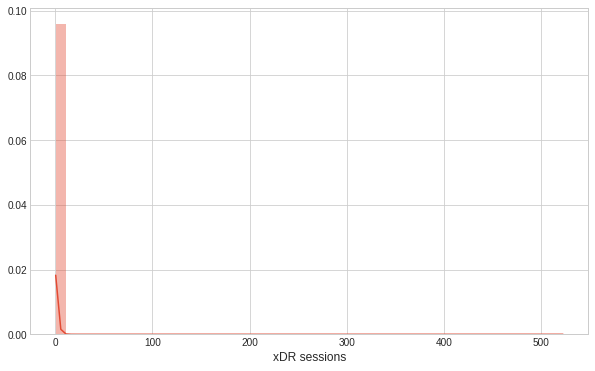

In [58]:
plt.subplots(figsize=(10, 6))
sns.distplot(NumberOfSessions["xDR sessions"], hist=True)

In [59]:
SessionDuration.head()

,sessions duration(ms)
msisdn/number,
"33,601,001,722.00","116,720,140.00"
"33,601,001,754.00","181,230,963.00"
"33,601,002,511.00","134,969,374.00"
"33,601,007,832.00","49,878,024.00"
"33,601,008,617.00","37,104,453.00"


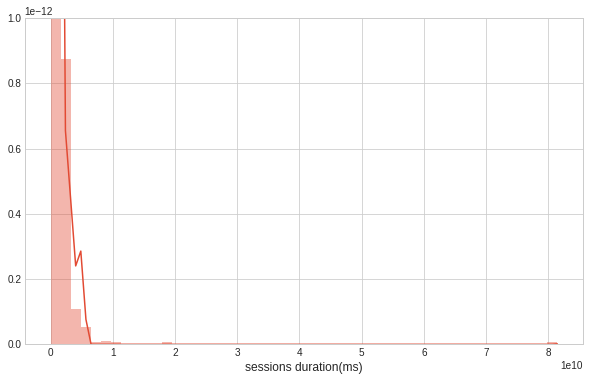

In [60]:
plt.subplots(figsize=(10, 6))
sns.distplot(SessionDuration["sessions duration(ms)"], hist=True)

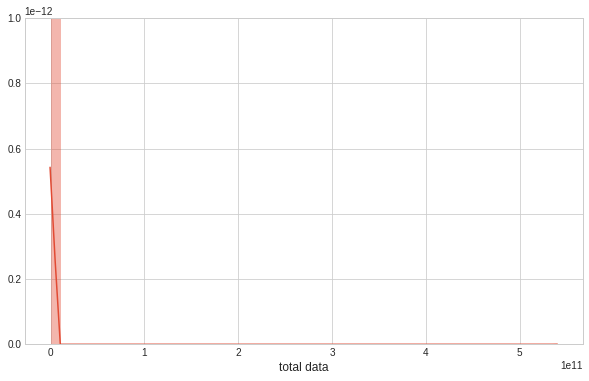

In [69]:
plt.subplots(figsize=(10, 6))
sns.distplot(UpDownload_user["total data"], hist=True)

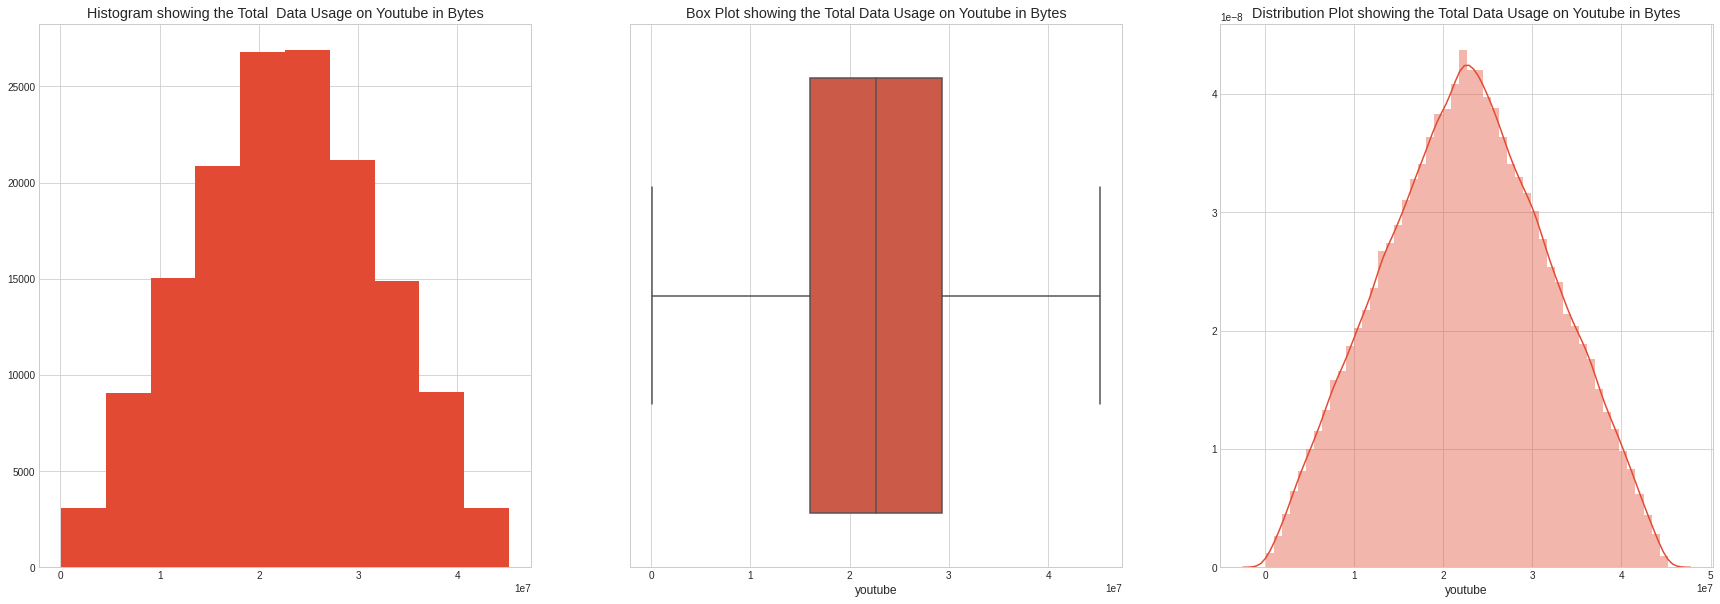

In [63]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["youtube"]);
sns.boxplot(df["youtube"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total  Data Usage on Youtube in Bytes')
ax[1].title.set_text('Box Plot showing the Total Data Usage on Youtube in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Data Usage on Youtube in Bytes')
sns.distplot(df["youtube"], ax=ax[2]);
fig.savefig('Youtube.jpeg')

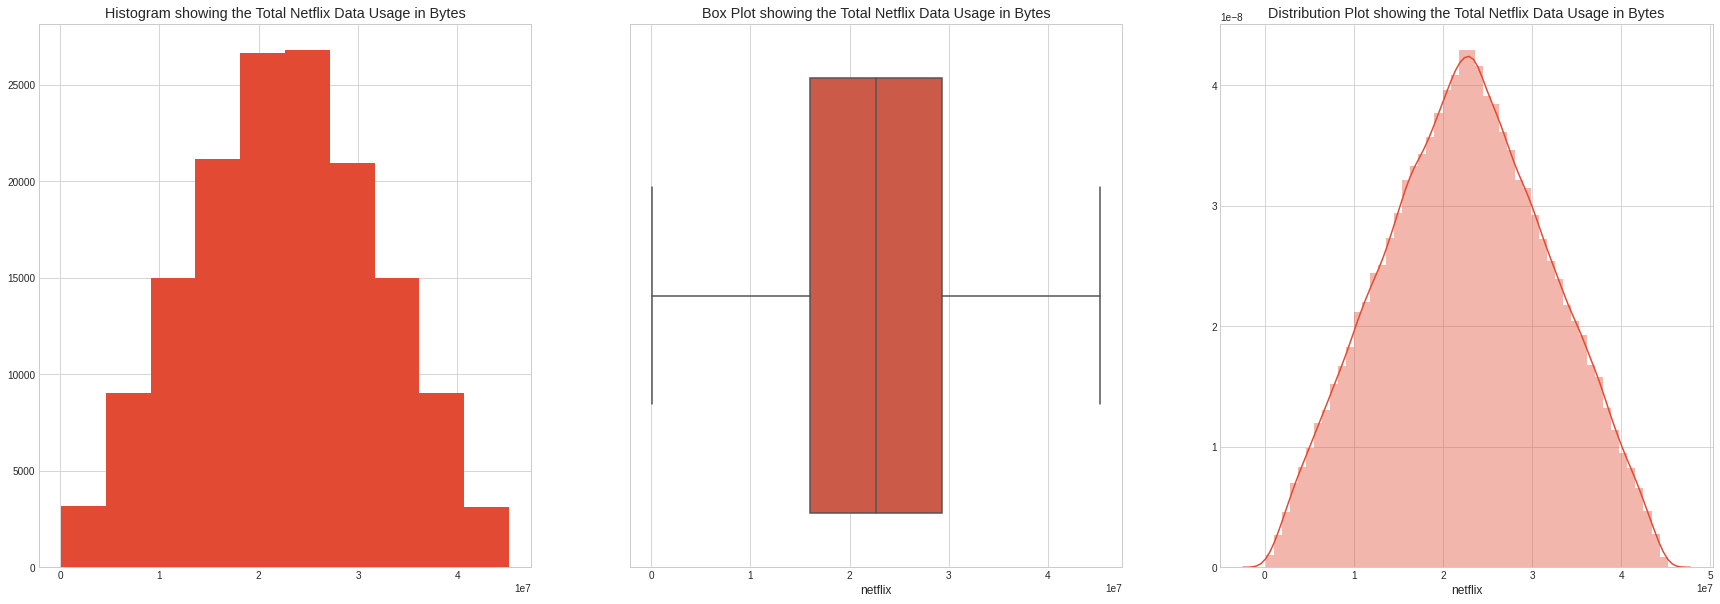

In [64]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["netflix"]);
sns.boxplot(df["netflix"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Netflix Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Netflix Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Netflix Data Usage in Bytes')
sns.distplot(df["netflix"], ax=ax[2]);
fig.savefig('netflix.jpeg')

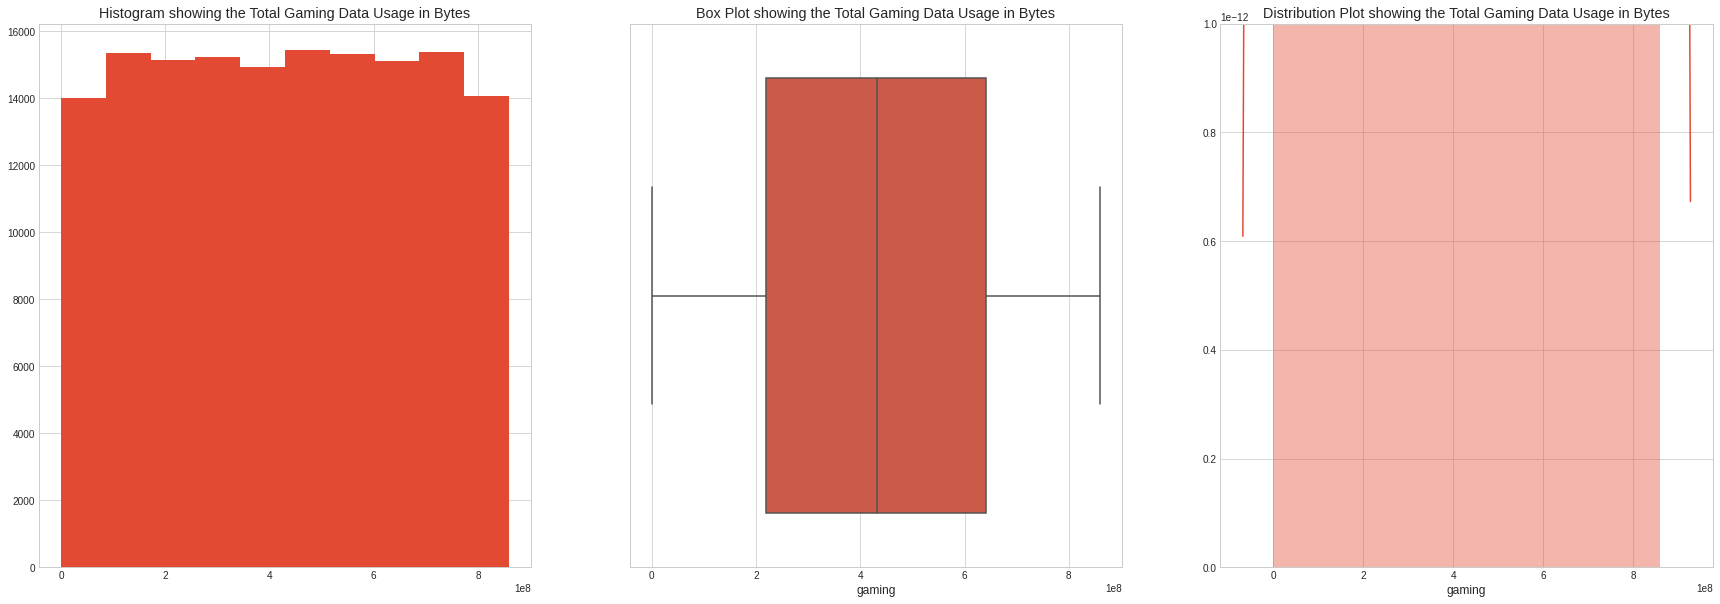

In [66]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["gaming"]);
sns.boxplot(df["gaming"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Gaming Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Gaming Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Gaming Data Usage in Bytes')
sns.distplot(df["gaming"], ax=ax[2]);
fig.savefig('gaming.jpeg')

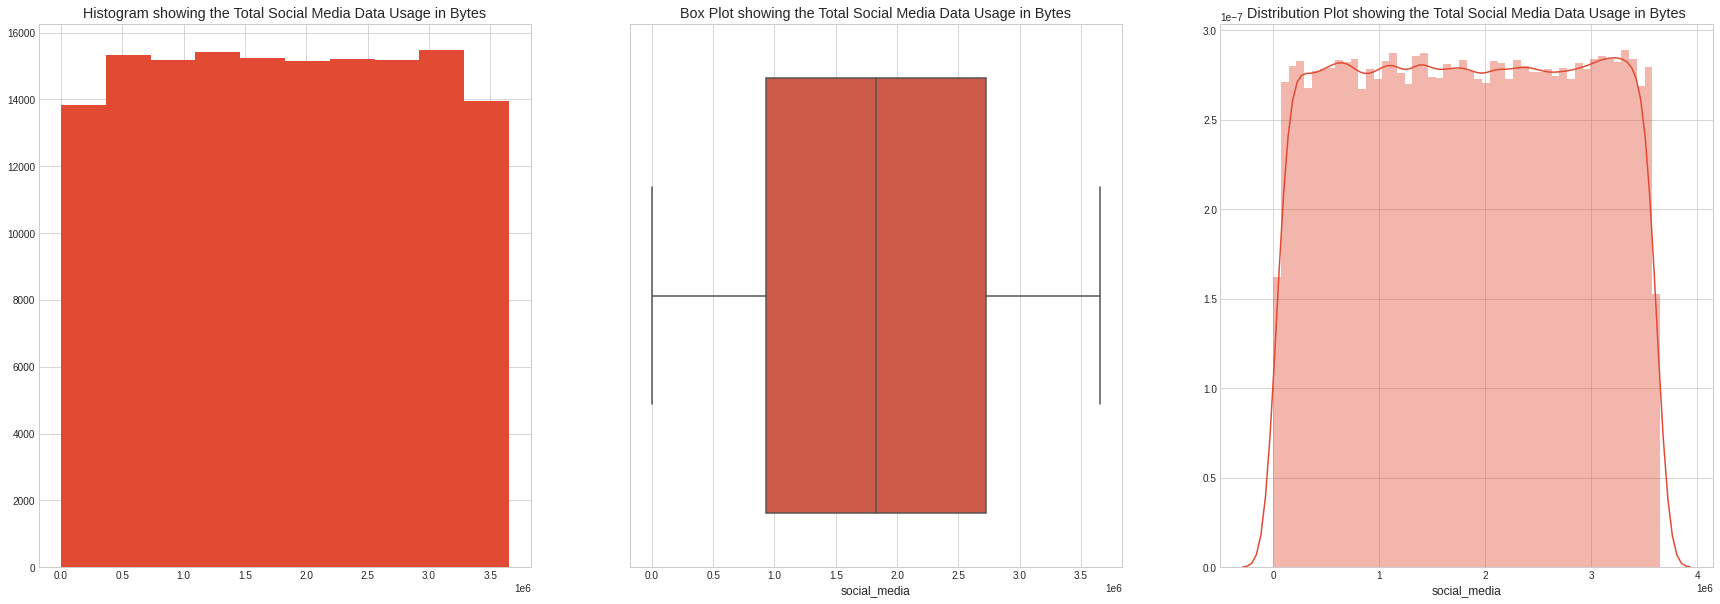

In [70]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["social_media"]);
sns.boxplot(df["social_media"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Social Media Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Social Media Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Social Media Data Usage in Bytes')
sns.distplot(df["social_media"], ax=ax[2]);
fig.savefig('social_media.jpeg')

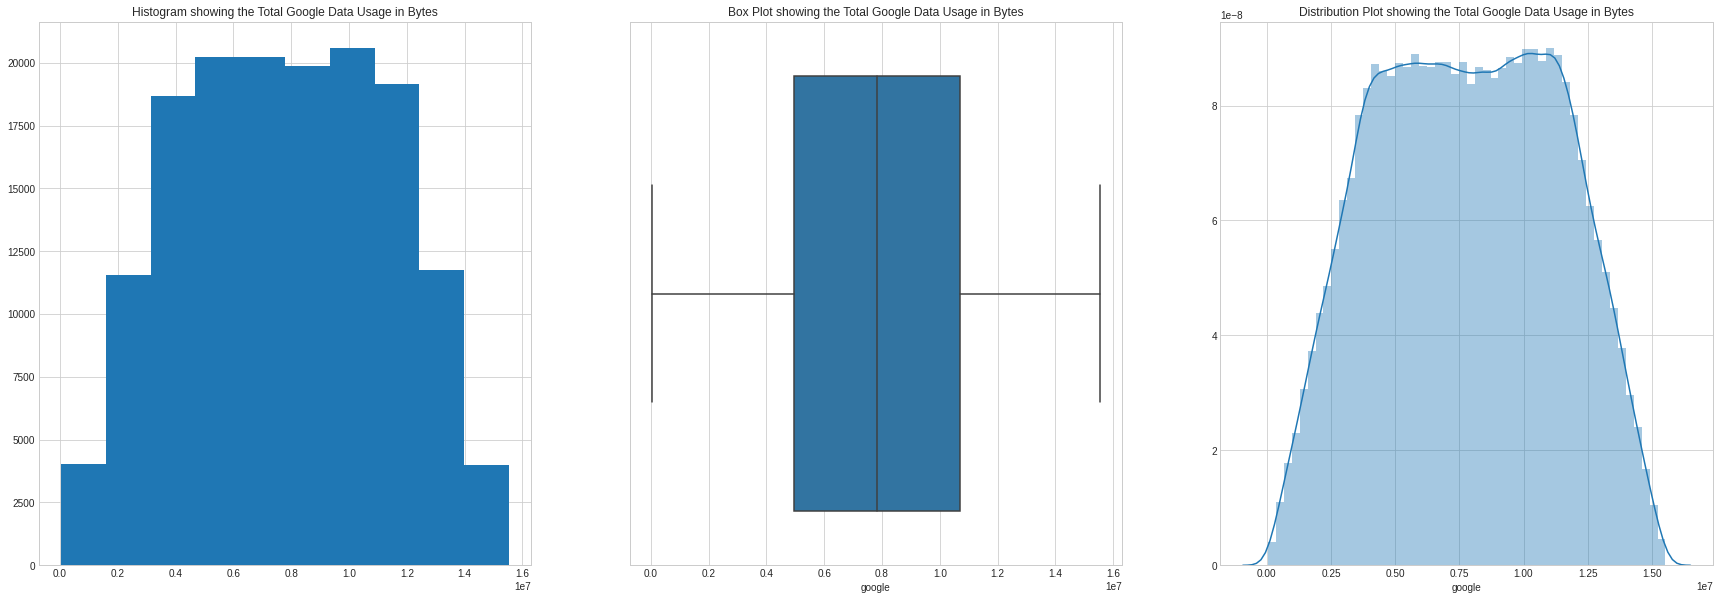

In [53]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["google"]);
sns.boxplot(df["google"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Google Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Google Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Google Data Usage in Bytes')
sns.distplot(df["google"], ax=ax[2]);
fig.savefig('google.jpeg')

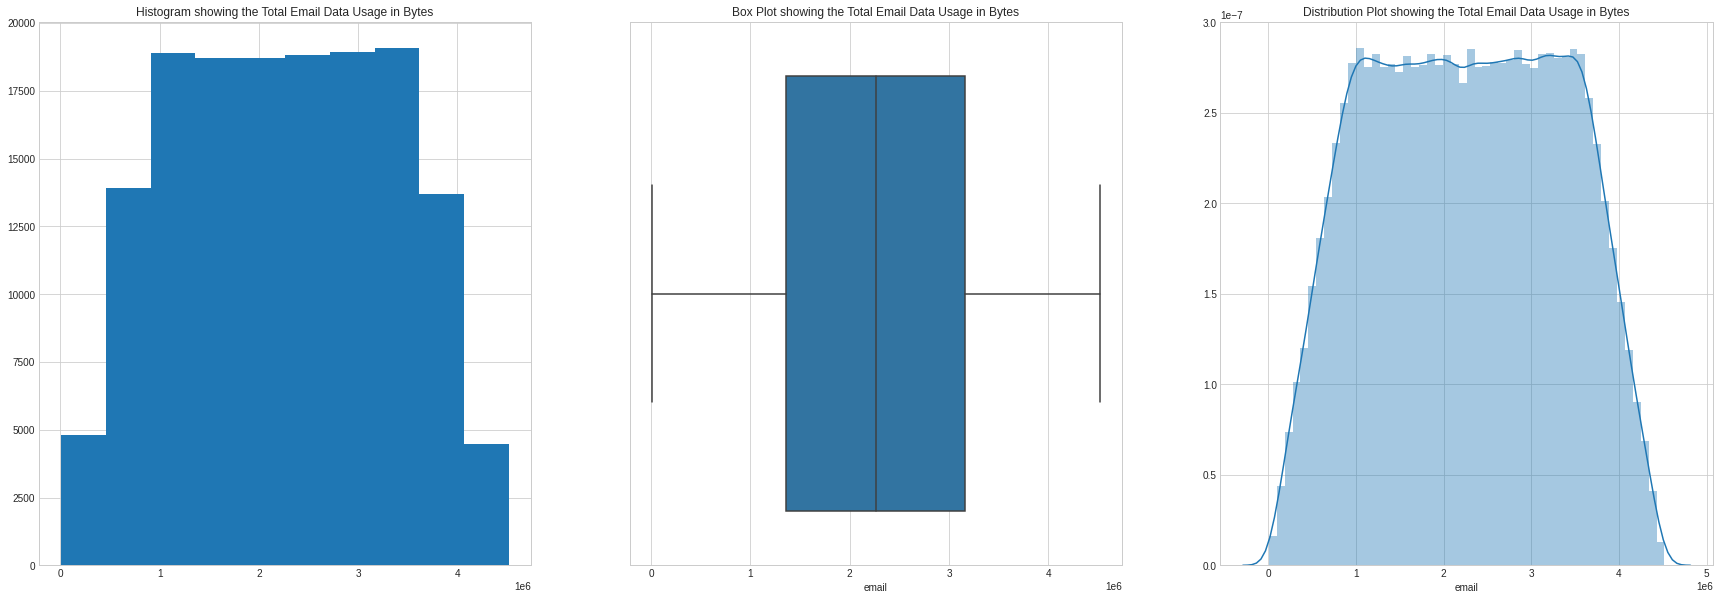

In [52]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["email"]);
sns.boxplot(df["email"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Email Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Email Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Email Data Usage in Bytes')
sns.distplot(df["email"], ax=ax[2]);
fig.savefig('email.jpeg')

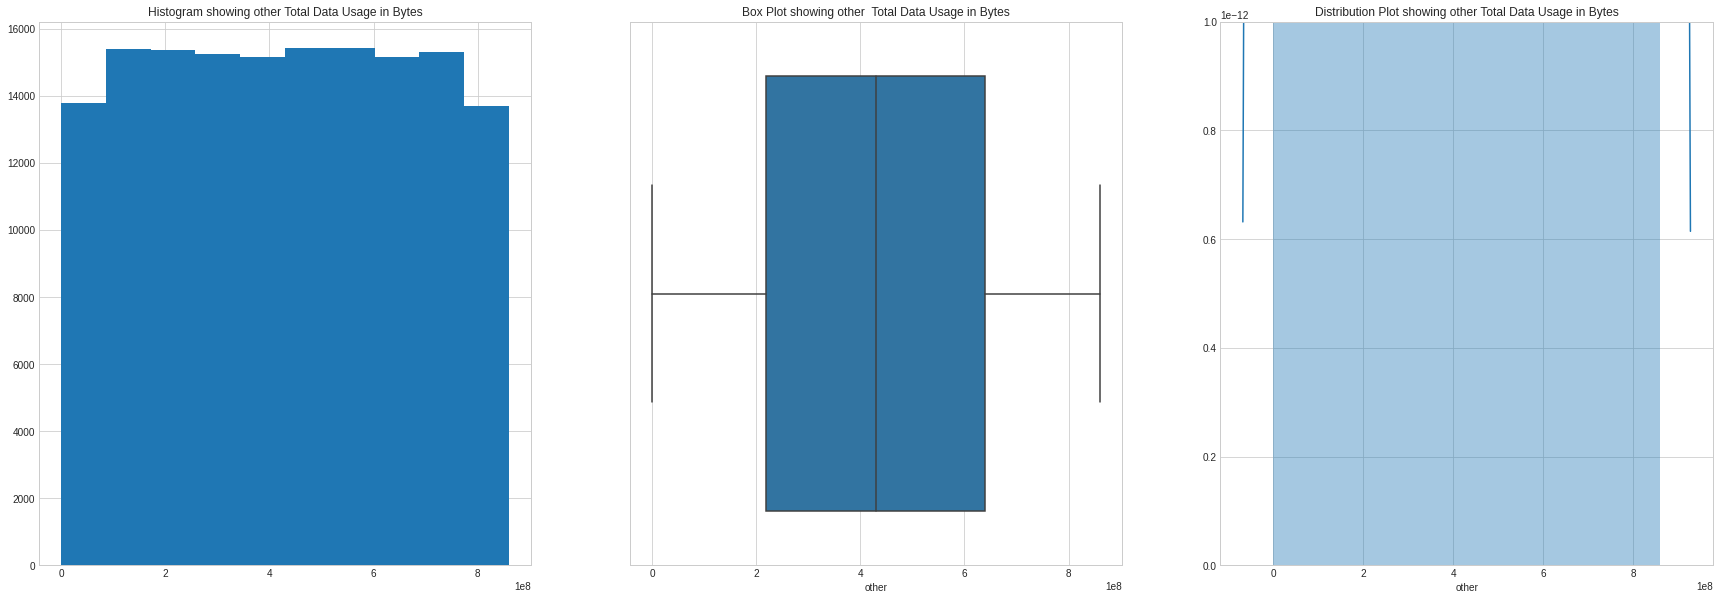

In [51]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["other"]);
sns.boxplot(df["other"], ax=ax[1]);
ax[0].title.set_text('Histogram showing other Total Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing other  Total Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing other Total Data Usage in Bytes')
sns.distplot(df["other"], ax=ax[2]);
fig.savefig('other.jpeg')

In [345]:
applicationDownUp.head(6)

,msisdn/number,social_media,google,email,youtube,netflix,gaming,other
0,33664962239.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,33681854413.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,33760627129.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,33750343200.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0
4,33699795932.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0
5,33668185951.0,3200014.0,12934133.0,2902410.0,23944031.0,13881809.0,723461512.0,659414334.0


In [54]:
new = pd.DataFrame(applicationDownUp.sum(axis=0, skipna=True)).reset_index()
new= new.rename(columns={'index':"Applications",0:"Sum"})
new = new[1:8]

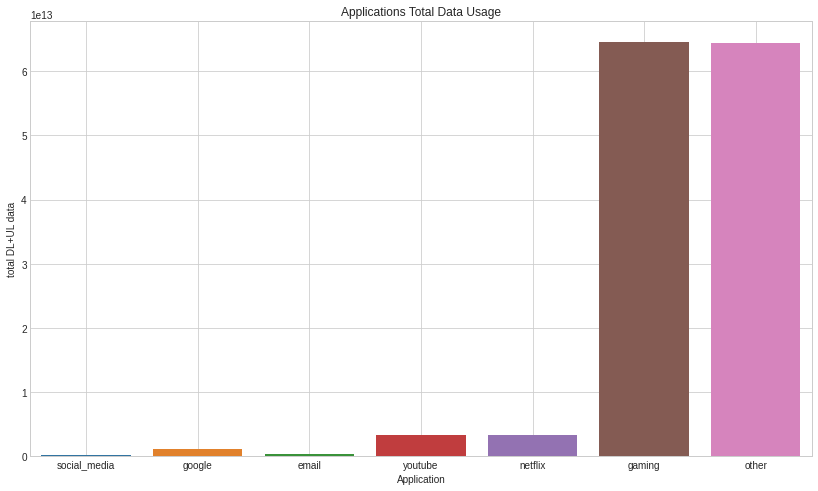

In [55]:
plt.figure(figsize=(14,8))
sns.barplot(x = new['Applications'], y = new['Sum'])
plt.title('Applications Total Data Usage')
plt.ylabel('total DL+UL data')
plt.xlabel('Application')
plt.grid(True)

### Variable Transformation 

segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class

 The conclusion i came to after i saw this question is that they want us to group the values into decile based on the duration of the user sessions and then take out only the top 5 decile and calculate the sum of the DL and UL for each of the 5 decile that you took out from the dataset.


    I would start by grouping the df into decile based on the duration column

In [143]:
df['dur._(ms)'].describe()

count              85,544.00
mean              106,120.92
std                53,820.98
min                 7,142.00
25%                66,117.25
50%                99,353.00
75%               146,290.50
max               244,900.00
Name: dur._(ms), dtype: float64

In [217]:
df['decile_rank'] = pd.qcut(df['dur._(ms)'], 5, labels = False)

I would look at the value counts to see if our decile are equally spaced, this shows that what we did worked well 

In [218]:
df['decile_rank'].value_counts()

1    47703
0    30001
4    30000
3    29999
2    12298
Name: decile_rank, dtype: int64

In [223]:
DecileTrans = df[['decile_rank','total data']]
DecileTrans =DecileTrans.groupby('decile_rank').sum()

In [224]:
DecileTrans

,total data
decile_rank,
0,"14,884,042,464,242.00"
1,"23,619,974,329,426.00"
2,"6,089,082,890,991.00"
3,"14,853,749,937,219.37"
4,"14,918,341,598,419.00"


We would use isin to remove other columns that their decile rank is not the in top 5 ranks

**sessions frequency   
the duration of the session  
the sessions total traffic (download and upload (bytes))**  


Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [243]:
vre = df[['msisdn/number','bearer_id','dur._(ms).1','total data']].copy()

In [314]:
vre.head()

,msisdn/number,bearer_id,dur._(ms).1,total data
0,33664962239.0,13114483460844900352,1.823653e+09,345629377.0
1,33681854413.0,13114483482878900224,1.365104e+09,707185356.0
2,33760627129.0,13114483484080500736,1.361763e+09,307690973.0
3,33750343200.0,13114483485442799616,1.321510e+09,889352748.0
4,33699795932.0,13114483499480700928,1.089009e+09,607681403.0


In [ ]:
def remove_outlier(column, df):
    """ This help replace all the outliers in the dataframe
    with the median of the dataset"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR= Q3 -Q1
    mean =df[column].mean()
    lower = Q1 -1.5* IQR
    upper = Q3 + 1.5 * IQR
    print(mean)
    print(upper)
    df[column] = np.where((df[column] > upper), mean, df[column])
    return df[column]

We start with summing all the values in the data set by the customer ID

In [288]:
metrics_user =vre.groupby('msisdn/number').sum()

We were only able to get the sum of 2 values here, duration and total data used, since bearer_id is a unique identifier we would use count to get the values for bearer id 

In [293]:
f = vre.groupby('msisdn/number').count()
f = f['bearer_id']
metrics_user['bearer_id(count)']= f

In [294]:
def remove_outlier(column, df):
    """ This help replace all the outliers in the dataframe
    with the median of the dataset"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR= Q3 -Q1
    mean =df[column].mean()
    lower = Q1 -1.5* IQR
    upper = Q3 + 1.5 * IQR
    print(mean)
    print(upper)
    df[column] = np.where((df[column] > upper), mean, df[column])
    return df[column]

In [295]:
metrics_user['dur._(ms).1'] = remove_outlier('dur._(ms).1', metrics_user)

116827621.73074484
281892147.0


In [296]:
metrics_user['total data'] = remove_outlier('total data', metrics_user)

618653192.8479024
1488795282.5


In [297]:
metrics_user['bearer_id(count)'] = remove_outlier('bearer_id(count)', metrics_user)

1.4037545504739979
3.5


In [298]:
metrics_user.sort_values(['dur._(ms).1'], ascending=False)

,dur._(ms).1,total data,bearer_id(count)
msisdn/number,,,
33676407111.0,281884898.0,7.900983e+08,1.0
33650432223.0,281878770.0,1.274930e+09,2.0
33658768890.0,281875729.0,1.839729e+08,1.0
33626284477.0,281861028.0,9.004433e+08,2.0
33663456552.0,281854960.0,1.391014e+09,2.0
...,...,...,...
33650431620.0,7267018.0,2.088937e+08,1.0
33698390293.0,7258080.0,8.366596e+08,1.0
33659328207.0,7189000.0,2.798045e+08,1.0


In [299]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_array = scaler.fit_transform(metrics_user)

In [300]:
scaled_dataframe = pd.DataFrame(scaled_array, columns=metrics_user.columns, index=metrics_user.index)

In [301]:
scaled_dataframe.head()

,dur._(ms).1,total data,bearer_id(count)
msisdn/number,,,
3197020876596.0,0.542572,-1.192275,-0.555322
33601001722.0,0.060806,0.878520,-0.555322
33601001754.0,1.092465,-1.433328,-0.555322
33601002511.0,0.352649,-0.026977,-0.555322
33601007832.0,-1.008135,-0.583122,-0.555322


In [302]:
kclusters = 3


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scaled_array)

# check cluster labels generated for some row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 1, 2, 2, 2, 1, 2], dtype=int32)

In [303]:
metrics_user.insert(0, 'Cluster Label', kmeans.labels_)

In [304]:
metrics_user['Cluster Label'].value_counts()

1    52251
0    30115
2    24491
Name: Cluster Label, dtype: int64

Aggregate user total traffic per application and derive the top 10 most engaged users per application 

In [305]:
user_aggr = df[['msisdn/number','social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other',]].copy()

In [306]:
user_aggr =user_aggr.groupby('msisdn/number').sum()

In [307]:
user_aggr= user_aggr.reset_index()
user_aggr.head()

,msisdn/number,social_media,google,email,youtube,netflix,gaming,other
0,3197020876596.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,470526473.0
1,33601001722.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,812458661.0,386570872.0
2,33601001754.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,119750078.0,281710071.0
3,33601002511.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,538827713.0,501693672.0
4,33601007832.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,391126127.0,35279702.0


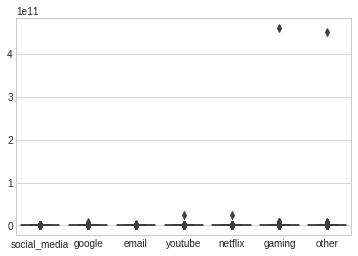

In [318]:
bp =sns.boxplot(data = user_aggr.iloc[ :, 1:8])

In [308]:
melted =pd.melt(user_aggr, id_vars="msisdn/number")

In [340]:
melted.head()

,msisdn/number,variable,value
427427,nan,youtube,2.434073e+10
333752,33625779332.0,youtube,4.529588e+08
413496,33760536639.0,youtube,3.962892e+08
327009,33614892860.0,youtube,3.943702e+08
334098,33626320676.0,youtube,3.744830e+08


In [338]:
melted =melted.sort_values(['variable','value'], ascending=False).groupby('variable').head(10)

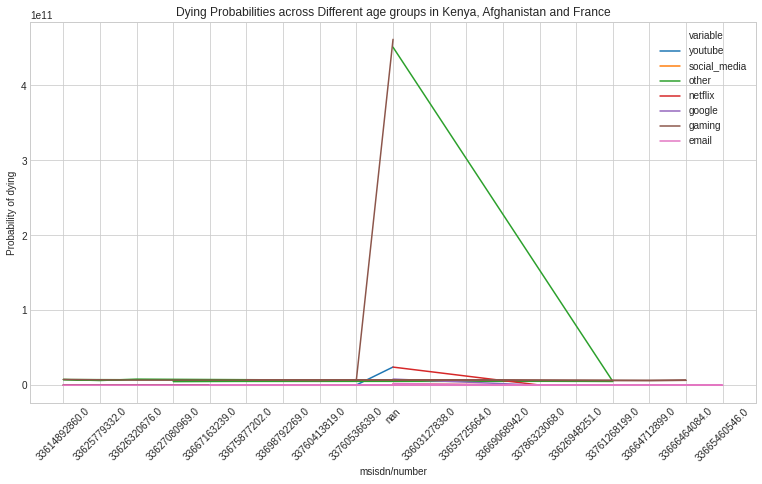

In [339]:
fig, ax = plt.subplots(figsize=(13,7))
sns.lineplot(melted['msisdn/number'], melted['value'], hue = melted['variable'])
plt.xticks(rotation=45)
plt.ylabel('Probability of dying')
plt.title('Dying Probabilities across Different age groups in Kenya, Afghanistan and France')
plt.savefig('probability of dying.jpg')


In [327]:
top_apps=melted.groupby('variable').sum().reset_index()

In [328]:
top_apps =top_apps.rename(columns={'variable': 'Apps', 'value': 'Total Data used'})

In [333]:
top_apps = top_apps.sort_values('Total Data used')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

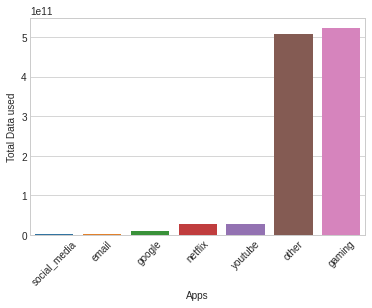

In [335]:
sns.barplot(x = top_apps['Apps'], y = top_apps['Total Data used'])
plt.xticks(rotation=45)

Average TCP retransmission    
Average RTT    
Handset type    
Average throughput   


###  Compute & list 10 of the top, bottom and most frequent 
#### TCP values in the dataset. 


Identifying and treating the outliers in the metrics analyzed now


In [6]:
transm =df[['avg_rtt_dl_(ms)', 'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)',
       'avg_bearer_tp_ul_(kbps)', 'tcp_dl_retrans._vol_(bytes)',
       'tcp_ul_retrans._vol_(bytes)','handset_type', 'msisdn/number']].copy()

#### Converting microseconds to second, Kbps to mbps and bytes to megabytes in our dataset 


To convert from ms to seconds we would divide by 1×10^+6

In [7]:
transm[['avg_rtt_dl_(ms)','avg_rtt_ul_(ms)']] = transm[['avg_rtt_dl_(ms)','avg_rtt_ul_(ms)']] / 10**+6

To convert from bytes to megabytes we would divide by  1×10^+6

In [8]:
transm[['tcp_dl_retrans._vol_(bytes)','tcp_ul_retrans._vol_(bytes)']] = transm[
    ['tcp_dl_retrans._vol_(bytes)','tcp_ul_retrans._vol_(bytes)']] * 10**-6

To convert from Kilobytes per second to megabyte per seconds we divide by 1000

In [9]:
transm[['avg_bearer_tp_dl_(kbps)','avg_bearer_tp_ul_(kbps)']] = transm[
    ['avg_bearer_tp_dl_(kbps)','avg_bearer_tp_ul_(kbps)']]/ 1000

We would rename all the columns to show the changes we have made

In [10]:
transm = transm.rename(columns={'avg_bearer_tp_dl_(kbps)':'avg_bearer_tp_dl_(mbps)',
                       'avg_bearer_tp_ul_(kbps)' :'avg_bearer_tp_ul_(mbps)',
                       'tcp_dl_retrans._vol_(bytes)':'tcp_dl_retrans._vol_(megabytes)',
                       'tcp_ul_retrans._vol_(bytes)':'tcp_ul_retrans._vol_(megabytes)',
                      'avg_rtt_dl_(ms)':'avg_rtt_dl_(s)','avg_rtt_ul_(ms)':'avg_rtt_ul_(s)'})

There is serious problem with this data, i do not understand the TCP retransmission volume is really large, i do not 

[Text(0, 0, 'avg_rtt_dl_(s)'),
 Text(0, 0, 'avg_rtt_ul_(s)'),
 Text(0, 0, 'avg_bearer_tp_dl_(mbps)'),
 Text(0, 0, 'avg_bearer_tp_ul_(mbps)'),
 Text(0, 0, 'tcp_dl_retrans._vol_(megabytes)'),
 Text(0, 0, 'tcp_ul_retrans._vol_(megabytes)')]

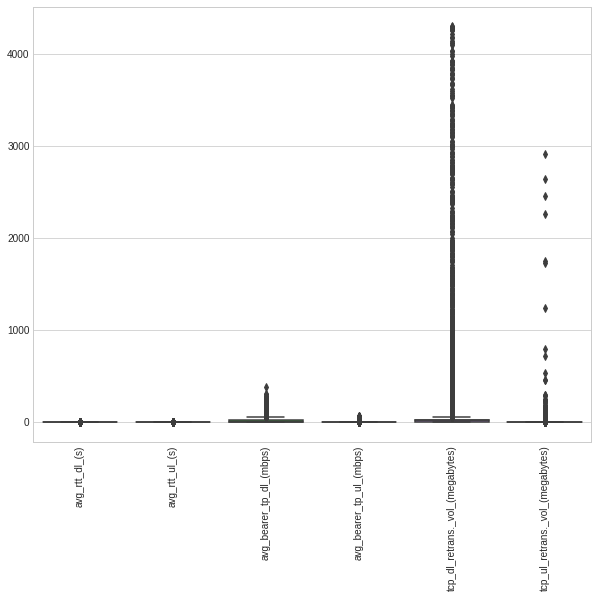

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
bp =sns.boxplot(data = transm.iloc[ :, 0:6])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

We notice that there is a serious problem with TCP upload retransmission volume which seems to have a lots of outliers, we would start with that column in particular

the next thing is replace this outliers by the median of the data frame since the mean is already affected by the outlier, normally outliers are dropped but we were told to replace them in this analysis 

In [12]:
def remove_outlier(column, df):
    """ This help replace all the outliers in the dataframe
    with the median of the dataset"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR= Q3 -Q1
    mean =df[column].mean()
    lower = Q1 -1.5* IQR
    upper = Q3 + 1.5 * IQR
    print(mean)
    print(upper)
    df[column] = np.where((df[column] > upper), mean, df[column])
    return df[column]

In [13]:
transm['avg_bearer_tp_ul_(mbps)'] = remove_outlier('avg_bearer_tp_ul_(mbps)', transm)


1.7704286466666668
2.7295000000000003


In [14]:
transm['avg_bearer_tp_dl_(mbps)'] = remove_outlier('avg_bearer_tp_dl_(mbps)', transm)


13.300045926666666
49.2105


In [15]:
transm['avg_rtt_ul_(s)'] = remove_outlier('avg_rtt_ul_(s)', transm)

1.766288291090033e-05
3.965720727725081e-05


In [16]:
transm['avg_rtt_dl_(s)'] = remove_outlier('avg_rtt_dl_(s)', transm)

0.0001097957060537603
0.00022198926513440073


In [17]:
transm['tcp_dl_retrans._vol_(megabytes)'] = remove_outlier('tcp_dl_retrans._vol_(megabytes)', transm)

20.809914270341928
50.025387675854816


In [18]:
transm['tcp_ul_retrans._vol_(megabytes)'] = remove_outlier('tcp_ul_retrans._vol_(megabytes)', transm)

0.759658664811066
1.804633162027665


[Text(0, 0, 'avg_rtt_dl_(s)'),
 Text(0, 0, 'avg_rtt_ul_(s)'),
 Text(0, 0, 'avg_bearer_tp_dl_(mbps)'),
 Text(0, 0, 'avg_bearer_tp_ul_(mbps)'),
 Text(0, 0, 'tcp_dl_retrans._vol_(megabytes)'),
 Text(0, 0, 'tcp_ul_retrans._vol_(megabytes)')]

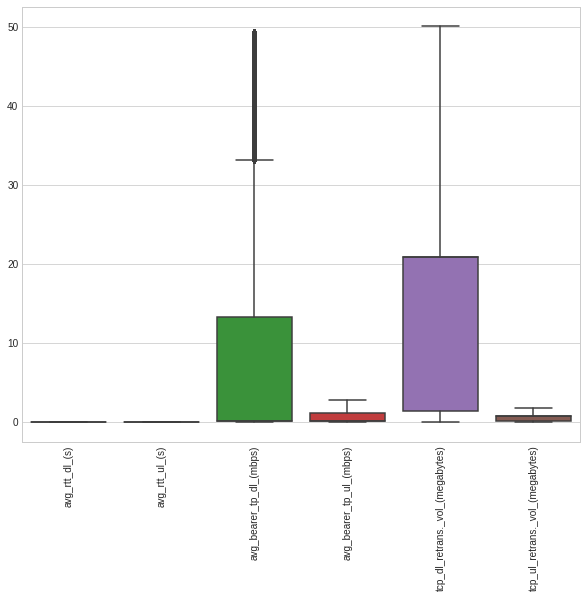

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
bp =sns.boxplot(data = transm.iloc[ :, 0:6])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

After removing the outliers i want to groupby the MSISDN and use aggregate on the respective columns, we would be aggregating by mean for some of the variable and sum for some of them 

#### Average TCP retransmission




In [20]:
user = transm.groupby('msisdn/number')

In [62]:
tcp_values= user.agg({'tcp_dl_retrans._vol_(megabytes)': 'mean'
                      ,'tcp_dl_retrans._vol_(megabytes)': 'mean'}
                    ).mean(axis=1).reset_index(name='TCP retrans vol(megabytes)')

In [63]:
tcp_values.head()

,msisdn/number,TCP retrans vol(megabytes)
0,3.360100e+10,20.809914
1,3.360100e+10,20.809914
2,3.360100e+10,20.809914
3,3.360101e+10,0.001066
4,3.360101e+10,15.079772


#### Average RTT

In [23]:
average_rtt = user.agg({'avg_rtt_dl_(s)': 'mean','avg_rtt_ul_(s)': 'mean'}
                      ).mean(axis=1).reset_index(name='Average RTT(s)')

In [24]:
average_rtt.head()

,msisdn/number,Average RTT(s)
0,3.360100e+10,0.000023
1,3.360100e+10,0.000016
2,3.360100e+10,0.000064
3,3.360101e+10,0.000042
4,3.360101e+10,0.000030


In [25]:
df = pd.read_csv('Cleaned.csv')

In [26]:
user.agg({'handset_type': 'size'}).sort_values('handset_type').reset_index()

,msisdn/number,handset_type
0,3.360100e+10,1
1,3.366740e+10,1
2,3.366740e+10,1
3,3.366740e+10,1
4,3.366740e+10,1
...,...,...
106851,3.367588e+10,15
106852,3.365973e+10,16
106853,3.362578e+10,17
106854,3.361489e+10,17


In [27]:
user.head()

,avg_rtt_dl_(s),avg_rtt_ul_(s),avg_bearer_tp_dl_(mbps),avg_bearer_tp_ul_(mbps),tcp_dl_retrans._vol_(megabytes),tcp_ul_retrans._vol_(megabytes),handset_type,msisdn/number
0,0.000042,0.000005,0.023000,0.044,20.809914,0.759659,Samsung Galaxy A5 Sm-A520F,3.366496e+10
1,0.000065,0.000005,0.016000,0.026,20.809914,0.759659,Samsung Galaxy J5 (Sm-J530),3.368185e+10
2,0.000110,0.000018,0.006000,0.009,20.809914,0.759659,Samsung Galaxy A8 (2018),3.376063e+10
3,0.000110,0.000018,0.044000,0.044,20.809914,0.759659,undefined,3.375034e+10
4,0.000110,0.000018,0.006000,0.009,20.809914,0.759659,Samsung Sm-G390F,3.369980e+10
...,...,...,...,...,...,...,...,...
149995,0.000110,0.000009,13.300046,1.393,16.552848,0.162614,undefined,3.366865e+10
149996,0.000032,0.000000,0.052000,0.065,20.809914,0.759659,Apple iPhone 8 Plus (A1897),3.365069e+10
149997,0.000027,0.000002,0.023000,0.054,20.809914,0.759659,Apple iPhone Se (A1723),3.366345e+10
149998,0.000043,0.000006,0.043000,0.047,20.809914,0.759659,Apple iPhone Xs (A2097),3.362189e+10



#### Average throughput

In [91]:
tp_values= user.agg({'avg_bearer_tp_dl_(mbps)': 'mean','avg_bearer_tp_dl_(mbps)':
                     'mean'}).sum(axis=1).reset_index(name='Avg bearer throughput(mbps)')

In [92]:
tp_values.head()

,msisdn/number,Avg bearer throughput(mbps)
0,3.360100e+10,0.0370
1,3.360100e+10,0.0480
2,3.360100e+10,0.0480
3,3.360101e+10,0.2040
4,3.360101e+10,20.1975


### 3.4 Using the experience metrics above, perform a k-means clustering 

In [150]:
three =[tp_values, average_rtt, tcp_values]

In [151]:
exp_metric = reduce(lambda left,right: pd.merge(left,right,on='msisdn/number'), three)

In [152]:
exp_metric=exp_metric.set_index('msisdn/number')

In [153]:
scaler = StandardScaler()

In [154]:
scaled_exp = scaler.fit_transform(exp_metric)

In [155]:
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scaled_exp)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 1, 1, 2, 1, 1, 0, 2], dtype=int32)

In [99]:
exp_metric.insert(0, 'Cluster Labels', kmeans.labels_)

In [100]:
exp_metric['Cluster Labels'].value_counts()

2    44037
1    35644
0    27175
Name: Cluster Labels, dtype: int64

In [102]:
exp_metric.groupby('Cluster Labels').max()

,Avg bearer throughput(mbps),Average RTT(s),TCP retrans vol(megabytes)
Cluster Labels,,,
0,49.157,0.000129,49.969605
1,49.205,0.000122,33.692870
2,48.845,0.000043,49.986038


In [103]:
exp_metric.groupby('Cluster Labels').min()

,Avg bearer throughput(mbps),Average RTT(s),TCP retrans vol(megabytes)
Cluster Labels,,,
0,0.000,0.000041,0.000037
1,0.001,0.000008,0.000002
2,0.000,0.000000,3.104009


In [104]:
exp_metric.groupby('Cluster Labels').mean()

,Avg bearer throughput(mbps),Average RTT(s),TCP retrans vol(megabytes)
Cluster Labels,,,
0,2.392569,0.000064,19.493545
1,17.674143,0.000041,3.579630
2,1.373873,0.000022,19.673742


What i noticed here is the only thing here that differentiate our customers experience is the average Round Trip Time which tells us how long it takes for the server 

In [32]:
def toplowestmost10(df, column):
    data = pd.DataFrame()
    data = df[column].value_counts().reset_index().head(10)
    data =data.rename(columns={"index" : column, column : 'count'})
    data['top'] = pd.Series(df[column].unique()).sort_values(ascending=False).head(10).reset_index(drop=True)
    data['lowest'] =pd.Series(df[column].unique()).sort_values(ascending=True).head(10).reset_index(drop=True)
    return data

In [33]:
data = toplowestmost10(tcp_values, 'TCP Values(megabytes)')

In [34]:
data

,TCP Values(megabytes),count,top,lowest
0,20.809914,59607,49.986038,0.000002
1,0.001330,247,49.969605,0.000004
2,0.002660,138,49.777538,0.000006
3,0.000092,112,49.619503,0.000008
4,10.405622,103,49.599533,0.000011
5,0.000038,99,49.591949,0.000012
6,0.001318,79,49.408068,0.000013
7,0.003990,72,49.398764,0.000016
8,10.404976,68,49.384238,0.000024
9,0.005320,64,49.279434,0.000030


In [35]:
data =toplowestmost10(tp_values, 'Throughput Values(mbps)')

In [46]:
data

,Average RTT(s),count,top,lowest
0,0.000064,19036,0.000129,0.000000
1,0.000015,2910,0.000128,0.000001
2,0.000019,2339,0.000126,0.000002
3,0.000014,1303,0.000124,0.000003
4,0.000015,1208,0.000124,0.000003
5,0.000019,1197,0.000123,0.000004
6,0.000016,1175,0.000123,0.000005
7,0.000024,1089,0.000122,0.000005
8,0.000021,1055,0.000121,0.000005
9,0.000020,975,0.000121,0.000006


Please the througput values only apply to the count of values, the remaining are actual values 

In [37]:
data = toplowestmost10(average_rtt, 'Average RTT(s)')

In [38]:
data

,Average RTT(s),count,top,lowest
0,0.000064,19036,0.000129,0.000000
1,0.000015,2910,0.000128,0.000001
2,0.000019,2339,0.000126,0.000002
3,0.000014,1303,0.000124,0.000003
4,0.000015,1208,0.000124,0.000003
5,0.000019,1197,0.000123,0.000004
6,0.000016,1175,0.000123,0.000005
7,0.000024,1089,0.000122,0.000005
8,0.000021,1055,0.000121,0.000005
9,0.000020,975,0.000121,0.000006



RTT values in the dataset.  
Throughput values in the dataset.   
Task 3.3 - Compute & report - (jupyter notebook + slide ):
The distribution of the average throughput  per handset type and provide interpretation for your findings.
The  view per handset type and provide interpretation for your findings.


#### Handset type

In [39]:
handset =transm.groupby('handset_type')

In [40]:
handset_avgtp = handset.agg({'avg_bearer_tp_dl_(mbps)': 'mean','avg_bearer_tp_dl_(mbps)': 'mean'}).mean(axis=1).reset_index(name='avg throughput(mbps)')

In [41]:
handset_avgtp.sort_values('avg throughput(mbps)', ascending=False).head(20)

,handset_type,avg throughput(mbps)
1328,Xiaomi Communica. M1803E1A,49.172
1357,Xiaomi Communica. Redmi Note 2,48.506
407,Huawei Nova 2I Huawei Mate 10 Lite,46.762
275,Htc 2Q6E100,44.811
443,Huawei Vns-Dl00,44.366
567,Lephone U Pro,44.226
437,Huawei Stf-Tl10,43.942
965,Samsung Galaxy S9 Sm-G960N,43.317
1323,Xiaomi Communica. B5,43.123
843,Samsung Galaxy A6 Duos (Sm-A605G Ds),42.295


In [42]:
handset_avgtp = handset.agg({'tcp_dl_retrans._vol_(megabytes)': 'mean','tcp_dl_retrans._vol_(megabytes)': 'mean'}).mean(axis=1).reset_index(name='avg_tcp_retrans_vol(megabytes)')

In [43]:
handset_avgtp.sort_values('avg_tcp_retrans_vol(megabytes)', ascending=False)

,handset_type,avg_tcp_retrans_vol(megabytes)
858,Samsung Galaxy Core 2 (Sm-G355X),46.394067
2,A-Link Telecom I. Cubot Note S,41.344479
1155,Spa Condor Elect. Allure M1 Plus,31.766178
802,Quartel Infotech. Maximus M84,30.871978
1198,Tcl Communicatio. Pixi 4 6 3G Android,30.528699
...,...,...
1197,Tcl Communicatio. Nura 2,0.000075
111,Archos Sa Sense 55S,0.000066
253,Hmd Global Oy Nokia 6 Ds,0.000057
681,Microsoft Mobile. Rm-1062 Lumia 640 Xl Lte,0.000045


In [175]:
centroids = kmeans.cluster_centers_[0]

In [168]:
scaled_exp

array([[-0.63465728, -0.74489548,  0.74532344],
       [-0.63366467, -1.09677904,  0.74532344],
       [-0.63366467,  1.1660338 ,  0.74532344],
       ...,
       [-0.63790581,  1.1660338 ,  0.74532344],
       [-0.63700344,  1.1660338 ,  0.74532344],
       [-0.63781557,  1.1660338 ,  0.74532344]])

In [177]:
centroids =centroids.reshape(-1, 3)

In [178]:
dists = pd.DataFrame(
    cdist(scaled_exp, centroids, 'euclidean'), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))])

In [181]:
dists

,dist_0
0,1.950801
1,2.299865
2,0.263290
3,2.456337
4,2.331610
...,...
106851,2.911888
106852,2.090068
106853,0.266746
106854,0.266009


In [ ]:

2-dimensional array


distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

